In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('ticks')

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [2]:
survey_data = pd.read_csv('data/Alabama Game Day Fan Experience Survey.csv')
survey_data.head()

,Timestamp,Age,Visiting the Quad,Visiting a local bar,Visiting a local restaurant,Attending the Walk of Champions,Attending the Elephant Stomp,Visiting the Bryant Museum,Tailgating or visiting a tailgate,Visiting the Supe Store and/or other merchandise vendors,Watching the Million Dollar Band at halftime,Watching the game inside Bryant Denny Stadium,"Watching pre-game activities inside Bryant Denny Stadium (warm-ups, flyover, highlight videos, etc.)","Watching ESPN College Gameday, SEC Nation, etc. (on television or live on campus)",Watching other games,Visiting a fraternity or sorority house,Listening to the Crimson Tide Sports Network,Autograph sessions with other teams or celebrities,"Visiting corporate activations (Coca-Cola Kickoff Zone, Mercedes Benz Fan Fest, Nissan Heisman House, etc.)",Optional - Please enter your email address if you would like to receive information about the findings.
0,2020/04/03 3:06:04 PM AST,18-24,5,3,4,4,1,2,5,1,2,4,4,2,2,1,1,1,1,NaN
1,2020/04/03 3:17:07 PM AST,25-34,1,4,1,1,1,1,5,1,2,5,5,5,5,1,4,1,1,ejchambers87@gmail.com
2,2020/04/03 5:18:43 PM AST,25-34,5,1,2,1,1,1,3,1,4,5,5,2,5,1,1,1,1,NaN
3,2020/04/03 5:30:50 PM AST,25-34,4,2,3,5,2,3,5,4,4,5,3,3,4,1,2,3,2,NaN
4,2020/04/03 6:09:21 PM AST,25-34,5,4,4,4,4,3,4,2,4,5,2,4,3,3,3,3,2,NaN


In [3]:
survey_data.rename(columns = {
                     'Visiting the Quad':'Quad',
                     'Visiting a local bar':'Bar',
                     'Visiting a local restaurant': 'Restaurant',
                     'Attending the Walk of Champions' : 'Walk of Champions',
                     'Attending the Elephant Stomp': 'Elephant Stomp',
                     'Visiting the Bryant Museum':'Bryant Museum',
                     'Tailgating or visiting a tailgate':'Tailgating', 
                     'Visiting the Supe Store and/or other merchandise vendors':'Supe Store',
                     'Watching the Million Dollar Band at halftime':'Million Dollar Band',
                     'Watching the game inside Bryant Denny Stadium':'Attending Game', 
                     'Watching pre-game activities inside Bryant Denny Stadium (warm-ups, flyover, highlight videos, etc.)':'Pregame',
                     'Watching ESPN College Gameday, SEC Nation, etc. (on television or live on campus)':'ESPN Shows', 
                     'Watching other games':'Other Games',
                     'Visiting a fraternity or sorority house':'Fraternities & Sororities',
                     'Listening to the Crimson Tide Sports Network':'Radio Show',
                     'Autograph sessions with other teams or celebrities':'Autographs',
                     'Visiting corporate activations (Coca-Cola Kickoff Zone, Mercedes Benz Fan Fest, Nissan Heisman House, etc.)': 'Corporate Activations'
                             },         
                    inplace = True)

survey_data.head()

,Timestamp,Age,Quad,Bar,Restaurant,Walk of Champions,Elephant Stomp,Bryant Museum,Tailgating,Supe Store,Million Dollar Band,Attending Game,Pregame,ESPN Shows,Other Games,Fraternities & Sororities,Radio Show,Autographs,Corporate Activations,Optional - Please enter your email address if you would like to receive information about the findings.
0,2020/04/03 3:06:04 PM AST,18-24,5,3,4,4,1,2,5,1,2,4,4,2,2,1,1,1,1,NaN
1,2020/04/03 3:17:07 PM AST,25-34,1,4,1,1,1,1,5,1,2,5,5,5,5,1,4,1,1,ejchambers87@gmail.com
2,2020/04/03 5:18:43 PM AST,25-34,5,1,2,1,1,1,3,1,4,5,5,2,5,1,1,1,1,NaN
3,2020/04/03 5:30:50 PM AST,25-34,4,2,3,5,2,3,5,4,4,5,3,3,4,1,2,3,2,NaN
4,2020/04/03 6:09:21 PM AST,25-34,5,4,4,4,4,3,4,2,4,5,2,4,3,3,3,3,2,NaN


In [4]:
consideration_grouped = survey_data.iloc[:, 1:19]

consideration_grouped

,Age,Quad,Bar,Restaurant,Walk of Champions,Elephant Stomp,Bryant Museum,Tailgating,Supe Store,Million Dollar Band,Attending Game,Pregame,ESPN Shows,Other Games,Fraternities & Sororities,Radio Show,Autographs,Corporate Activations
0,18-24,5,3,4,4,1,2,5,1,2,4,4,2,2,1,1,1,1
1,25-34,1,4,1,1,1,1,5,1,2,5,5,5,5,1,4,1,1
2,25-34,5,1,2,1,1,1,3,1,4,5,5,2,5,1,1,1,1
3,25-34,4,2,3,5,2,3,5,4,4,5,3,3,4,1,2,3,2
4,25-34,5,4,4,4,4,3,4,2,4,5,2,4,3,3,3,3,2
5,18-24,5,3,4,3,2,1,5,1,2,4,2,3,4,1,1,1,2
6,35-44,2,5,3,2,2,1,4,3,3,2,2,5,5,3,1,1,1
7,35-44,4,3,4,2,1,1,4,2,5,5,5,4,2,1,5,1,2
8,55-64,3,4,4,3,3,3,4,5,3,5,4,3,4,3,4,3,4
9,25-34,5,4,5,4,4,5,4,3,3,4,4,4,3,2,3,2,2


In [5]:
consideration_grouped = consideration_grouped.groupby('Age').agg('sum')

consideration_grouped

,Quad,Bar,Restaurant,Walk of Champions,Elephant Stomp,Bryant Museum,Tailgating,Supe Store,Million Dollar Band,Attending Game,Pregame,ESPN Shows,Other Games,Fraternities & Sororities,Radio Show,Autographs,Corporate Activations
Age,,,,,,,,,,,,,,,,,
18-24,19,9,12,13,13,9,16,7,14,18,16,11,13,6,8,6,6
25-34,65,57,59,47,41,39,69,44,53,77,62,57,69,28,44,34,31
35-44,17,23,19,11,10,8,25,16,22,25,23,26,21,14,18,9,10
45-54,17,17,20,14,17,11,21,17,15,25,21,19,18,13,22,10,12
55-64,12,8,12,12,10,9,13,12,12,15,13,11,13,7,12,8,12


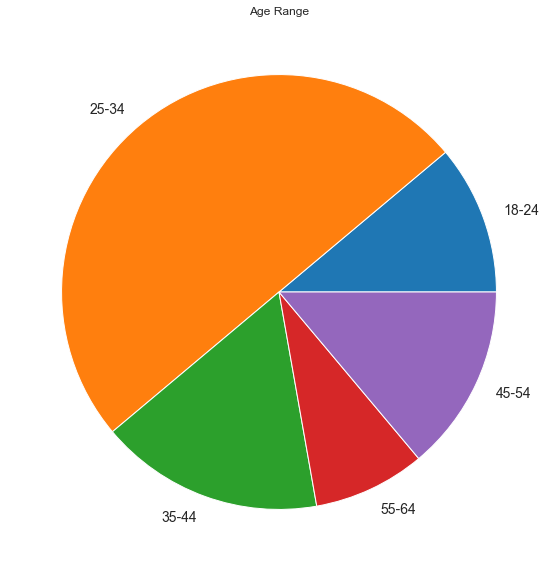

In [6]:
age = pd.Series(Counter(survey_data.Age.str.split(',').sum()))

age.sort_values(ascending=False)

age.plot(
    kind='pie',
    figsize=(10, 10),
    fontsize=14,
    title="Age Range"
    ).yaxis.label.set_visible(False)

plt.savefig('images/age.png')

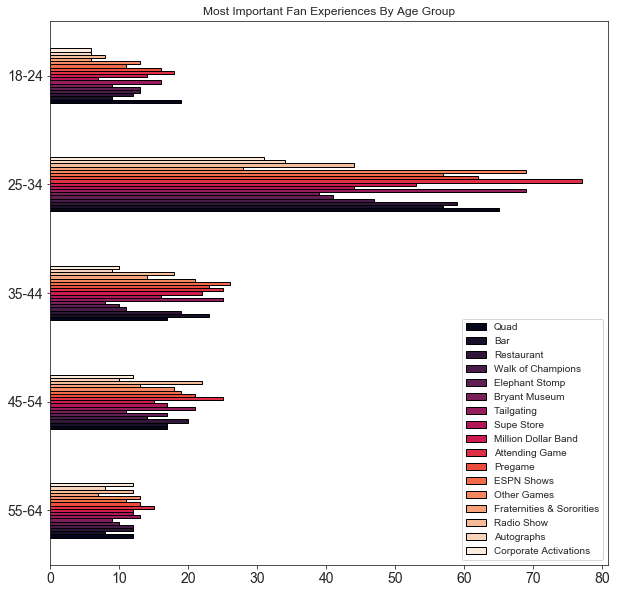

In [7]:
consideration_grouped.sort_index(ascending=False).plot(
    kind='barh',
    figsize=(10, 10),
    cmap='rocket',
    edgecolor='black',
    fontsize=14,
    title='Most Important Fan Experiences By Age Group'
    ).yaxis.label.set_visible(False)

plt.savefig('images/age_grouped.png')

In [8]:
def plot_counts_by_age_group(groupby_count_obj, Age, ax=None):
    
    sort_order = groupby_count_obj.loc[Age].sort_index().index

    sns.barplot(y = groupby_count_obj.loc[Age].index, 
                x = groupby_count_obj.loc[Age].values, 
                order = sort_order, 
                palette = 'rocket', edgecolor = 'black', 
                ax = ax
                ).set_title("Age {}".format(Age))

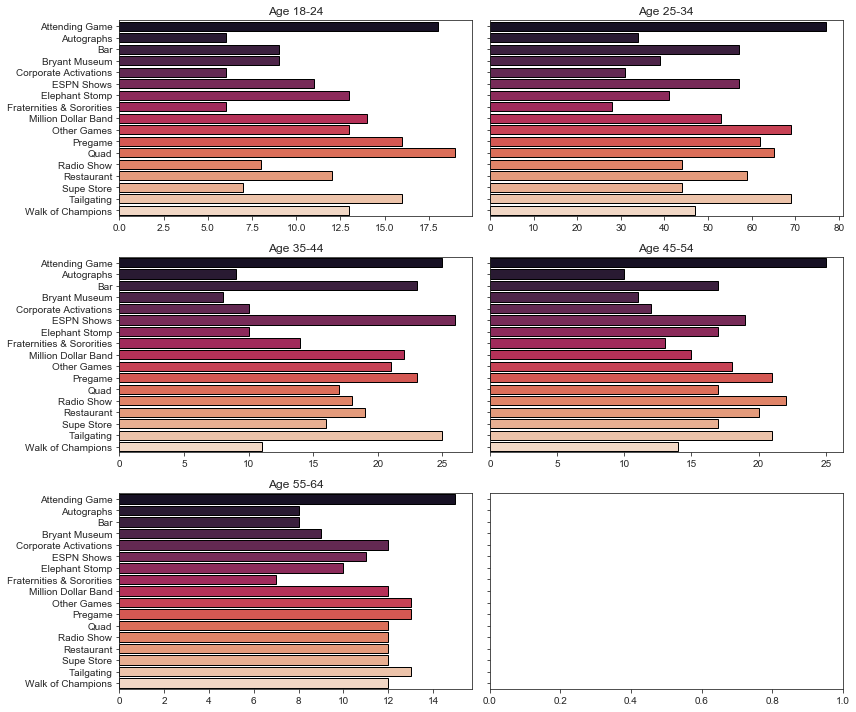

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 10), sharey=True)

for subplot, Age in zip(ax.flatten(), list(consideration_grouped.index)):
    plot_counts_by_age_group(consideration_grouped, Age, ax=subplot)
    
plt.tight_layout()

plt.savefig('images/age_seperate.png')

In [10]:
benefits_encoded = survey_data.iloc[:, 2:19]

benefits_encoded

,Quad,Bar,Restaurant,Walk of Champions,Elephant Stomp,Bryant Museum,Tailgating,Supe Store,Million Dollar Band,Attending Game,Pregame,ESPN Shows,Other Games,Fraternities & Sororities,Radio Show,Autographs,Corporate Activations
0,5,3,4,4,1,2,5,1,2,4,4,2,2,1,1,1,1
1,1,4,1,1,1,1,5,1,2,5,5,5,5,1,4,1,1
2,5,1,2,1,1,1,3,1,4,5,5,2,5,1,1,1,1
3,4,2,3,5,2,3,5,4,4,5,3,3,4,1,2,3,2
4,5,4,4,4,4,3,4,2,4,5,2,4,3,3,3,3,2
5,5,3,4,3,2,1,5,1,2,4,2,3,4,1,1,1,2
6,2,5,3,2,2,1,4,3,3,2,2,5,5,3,1,1,1
7,4,3,4,2,1,1,4,2,5,5,5,4,2,1,5,1,2
8,3,4,4,3,3,3,4,5,3,5,4,3,4,3,4,3,4
9,5,4,5,4,4,5,4,3,3,4,4,4,3,2,3,2,2


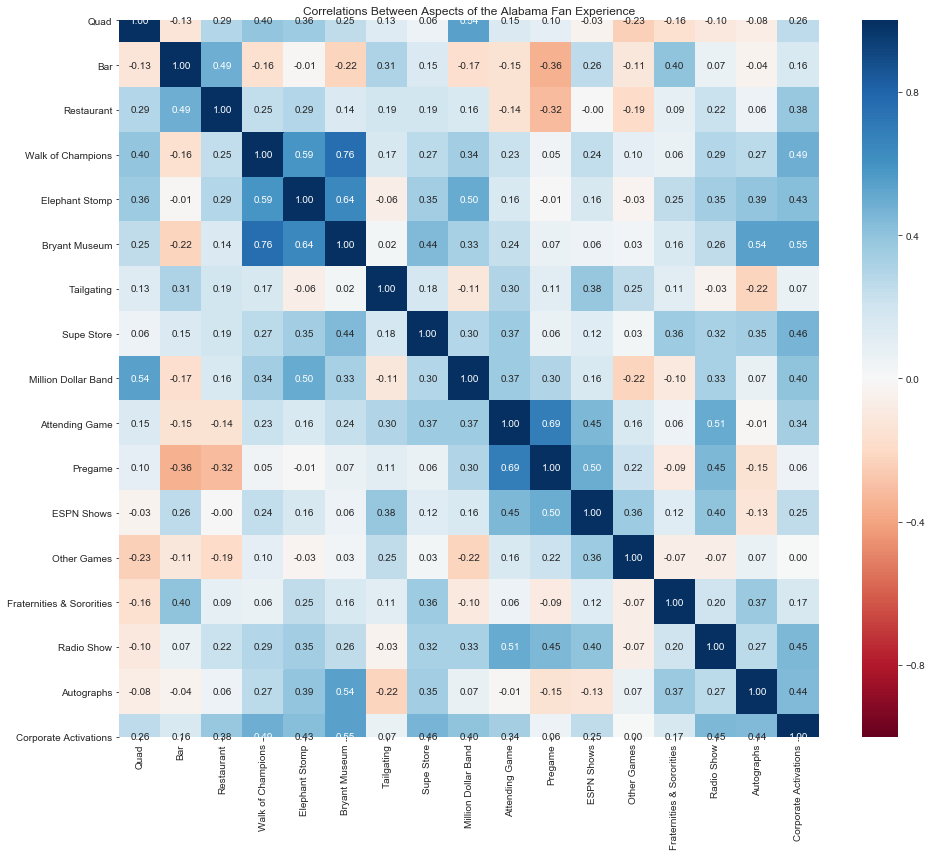

In [11]:
corr_matrix = benefits_encoded.corr(method='spearman')

fig, ax = plt.subplots(figsize=(14, 12))

sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.2f',
           vmin=-1, vmax=1)

plt.title("Correlations Between Aspects of the Alabama Fan Experience")

plt.tight_layout()

plt.savefig('images/corrmatrix.png')

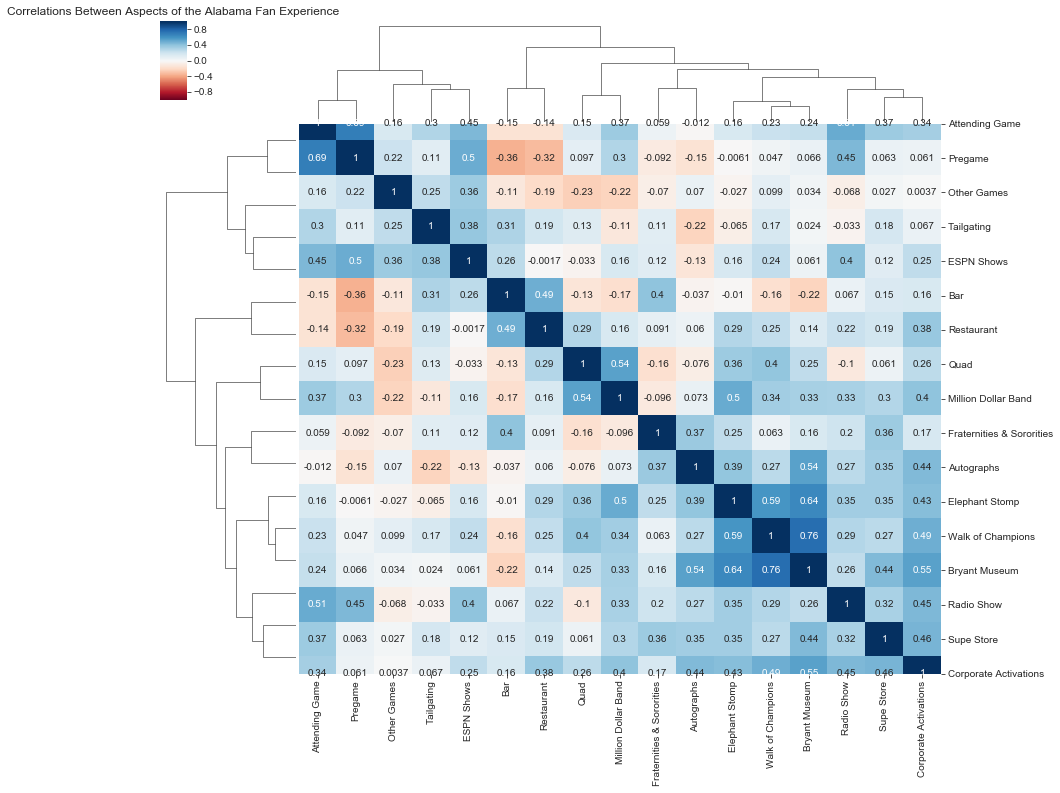

In [12]:
sns.clustermap(corr_matrix, method='ward', cmap='RdBu', annot=True,
               vmin=-1, vmax=1, figsize=(14,12))

plt.title("Correlations Between Aspects of the Alabama Fan Experience")

plt.tight_layout()

plt.savefig('images/clustermap.png')